<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_11_MedicalInsuarance/MedicalInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge , LassoCV
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (6).zip to archive (6).zip


In [3]:
import zipfile

with zipfile.ZipFile('archive (6).zip','r') as zip_ref:
  zip_ref.extractall('medical_data')

import os
print(os.listdir('medical_data'))

['insurance.csv']


In [4]:
df = pd.read_csv('medical_data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/tmp/ipython-input-10-201379171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


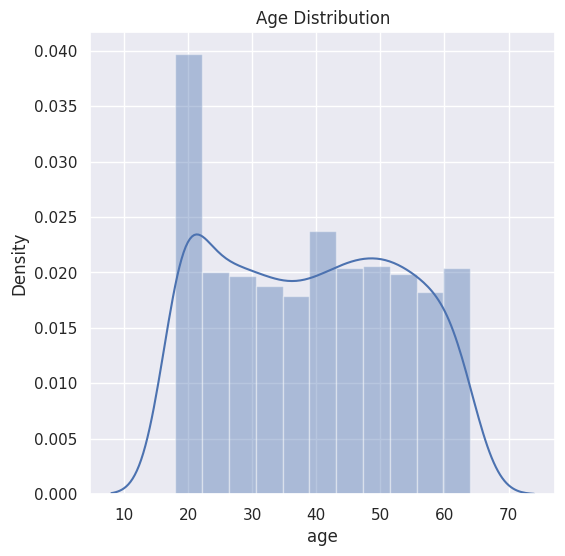

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

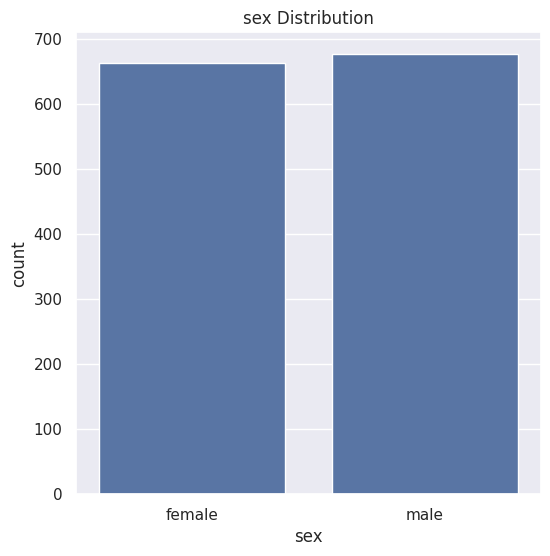

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('sex Distribution')
plt.show()

In [14]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-15-2333842265.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


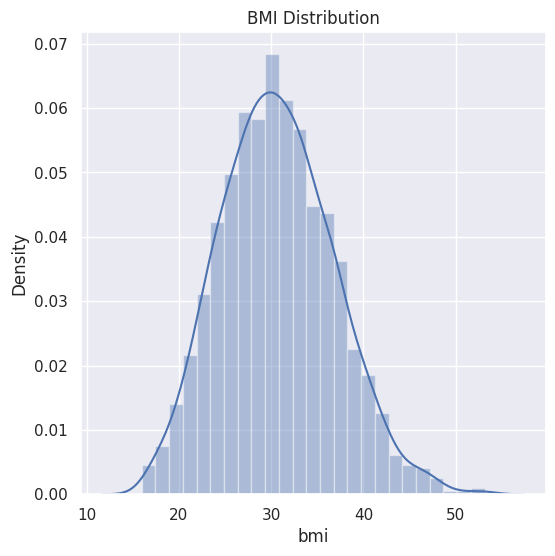

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

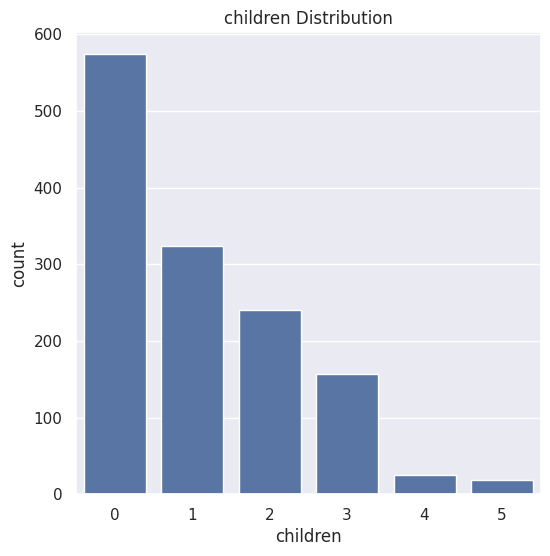

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children Distribution')
plt.show()

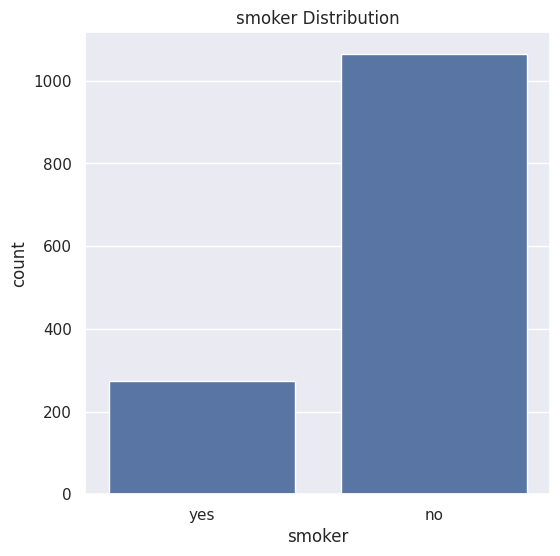

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker Distribution')
plt.show()

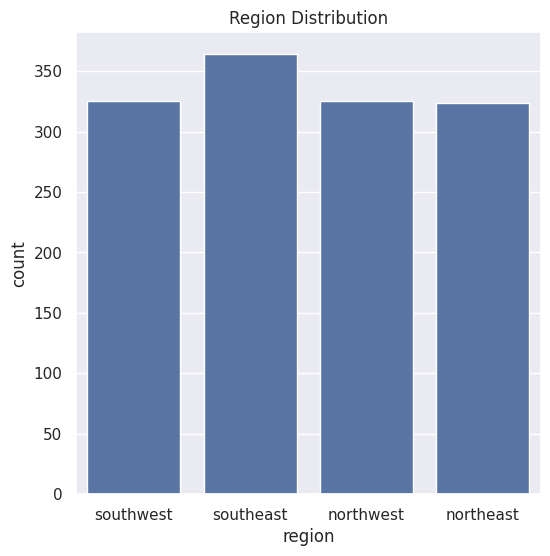

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.show()

/tmp/ipython-input-19-1921931180.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


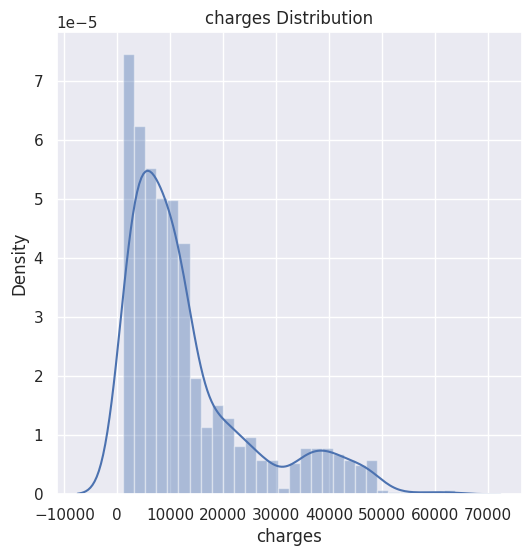

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

In [20]:
df.replace({'sex':{'male':0,'female':1} , 'smoker':{'yes':0,'no':1} , 'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}} , inplace=True)

/tmp/ipython-input-20-2154755491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1} , 'smoker':{'yes':0,'no':1} , 'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}} , inplace=True)


In [21]:
X = df.drop(['charges'],axis=1)
Y = df['charges']

In [22]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = LinearRegression()

In [38]:
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [39]:
train_preds = model.predict(X_train_scaled)

In [40]:
train_error_score = metrics.r2_score(train_preds,Y_train)
print(train_error_score)

0.6903834598920169


In [41]:
test_preds = model.predict(X_test_scaled)

In [42]:
error_score = metrics.r2_score(test_preds,Y_test)
print(error_score)

0.6576470827002758


In [55]:
# create Lasso model
lasso = Lasso(alpha=0.1)

# fit model
lasso.fit(X_train_scaled, Y_train)

# predict
y_pred = lasso.predict(X_test_scaled)

# evaluate
mse = metrics.mean_squared_error(Y_test, y_pred)
print("MSE (Lasso):", mse)

# coefficients
print("Coefficients:", lasso.coef_)

MSE (Lasso): 40941935.44903371
Coefficients: [ 3798.71609962   233.37328679  1915.71438492   492.13847952
 -9797.51563118   441.07880692]


In [56]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)

y_pred = ridge.predict(X_test_scaled)

mse = metrics.mean_squared_error(Y_test, y_pred)
print("MSE (Ridge):", mse)

print("Coefficients:", ridge.coef_)

MSE (Ridge): 40920910.563419834
Coefficients: [ 3794.47146068   231.97922284  1913.98410668   492.18123516
 -9786.79379821   439.60125008]


In [57]:
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
lasso_cv.fit(X_train_scaled, Y_train)

print("Best alpha:", lasso_cv.alpha_)
print("MSE:", metrics.mean_squared_error(Y_test, lasso_cv.predict(X_test_scaled)))
print("Coefficients:", lasso_cv.coef_)

Best alpha: 0.01
MSE: 40942220.14826876
Coefficients: [ 3798.80139261   233.47931934  1915.82840358   492.21774374
 -9797.62205641   441.20085217]
